In [15]:
# Time Series Analysis
# N02BA e N02BE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller, kpss    ##### unit root test
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm 
import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import itertools
import statsmodels.api as sm
# Evaluste Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
# read dataset
dataSales = pd.read_csv('salesdaily.csv', sep=',')
dataSales.head(5)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [4]:
# verify types of datum
type(dataSales.loc[0,'datum'])

str

In [5]:
# pass string to datetime
dataSales['datum'] = [datetime.datetime.strptime(x, "%m/%d/%Y") for x in dataSales['datum']]
type(dataSales.loc[0,'datum'])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
dataSales.head(5)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [7]:
# set date to index
dataSales.rename(columns={'datum':'date'}, inplace=True)
dataSales.set_index('date', inplace=True)
dataSales.head(5)

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
date,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [8]:
# select components N02BA and N02BE
dataM = dataSales[['N02BA', 'N02BE']]
dataM.head()

,N02BA,N02BE
date,,
2014-01-02,3.4,32.40
2014-01-03,4.4,50.60
2014-01-04,6.5,61.85
2014-01-05,7.0,41.10
2014-01-06,4.5,21.70


In [9]:
# analyse timeseries
N02BA = dataM[['N02BA']]
N02BE = dataM[['N02BE']]

print('Size\nN02BAB: {} | N02BE: {}'.format(N02BA.shape, N02BE.shape))

Size
N02BAB: (2106, 1) | N02BE: (2106, 1)


# Time Series Analysis

<Figure size 432x288 with 0 Axes>

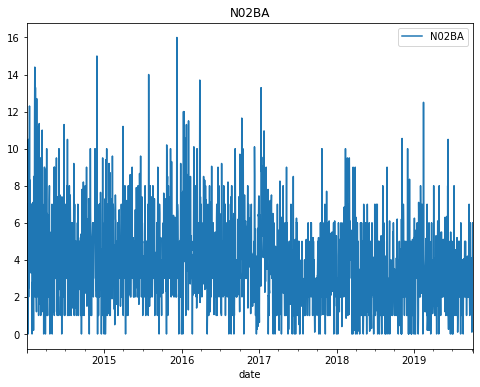

In [9]:
# M01AB
plt.figure()
N02BA.plot(figsize=(8, 6))
plt.title('N02BA')
plt.show()

Text(0.5, 1.0, 'Log Histogram')

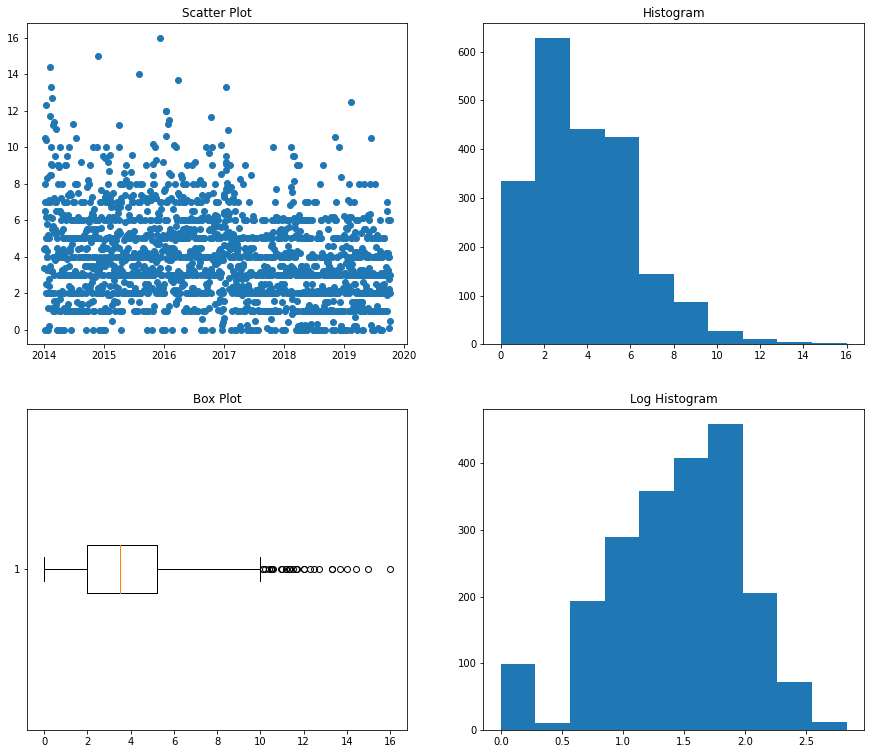

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(15, 13))
ax[0,0].scatter(y=N02BA, x=N02BA.index)
ax[0,0].set_title('Scatter Plot')
ax[0,1].hist(N02BA['N02BA'])
ax[0,1].set_title('Histogram')
ax[1,0].boxplot(N02BA['N02BA'], vert=False)
ax[1,0].set_title('Box Plot')
ax[1,1].hist(np.log(N02BA['N02BA'] + 1))
ax[1,1].set_title('Log Histogram')

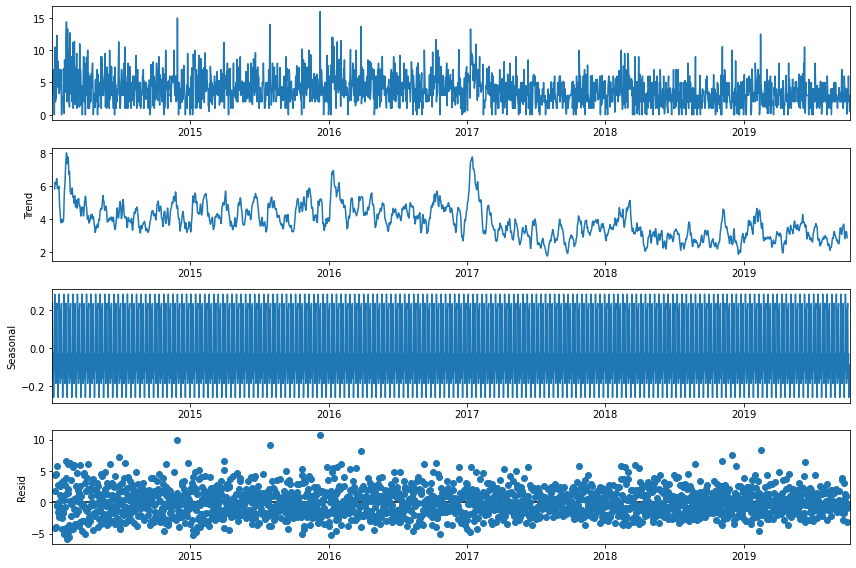

In [11]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
decomp = seasonal_decompose(N02BA, model='aditive',period=12)
decomp.plot()
plt.show()

In [23]:
# evaluate series stationarity - unit root test
test1_adf = adfuller(N02BA, regression='c')
test1_kpss = kpss(N02BA, regression='c')
print("ADF p-value = {} | KPSS p-value = {}".format(test1_adf[1],test1_kpss[1]))

ADF p-value = 8.213354081011082e-08 | KPSS p-value = 0.01


/home/a95022/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/a95022/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


[]

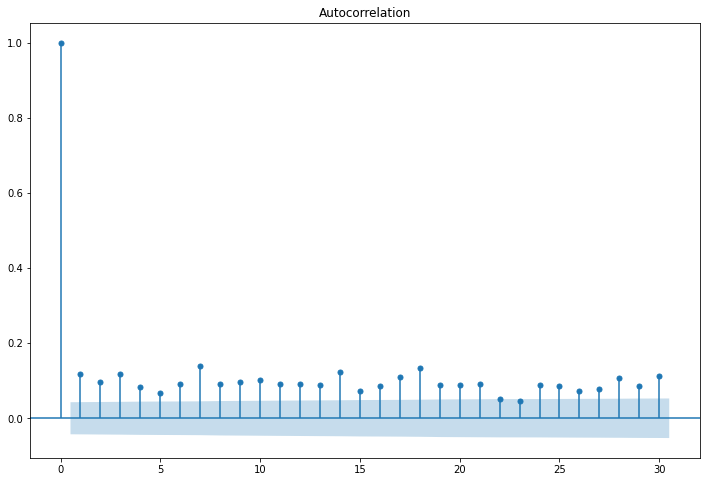

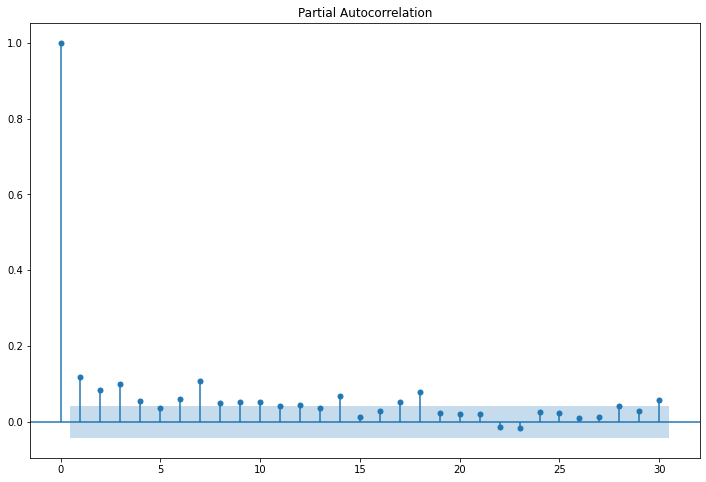

In [24]:
# correlogram
plot_acf(N02BA, lags=30, alpha=0.05)
plot_pacf(N02BA, lags=30, alpha=0.05)
plt.plot()

In [22]:
# we had inconclusive stationarity test: ADF said that serie is stationary and KPSS stated the opposite
# create difference of the logarithm of original value
difflog_N02BA = np.log(N02BA + 1).diff().dropna()
print(difflog_N02BA.shape)
difflog_N02BA.head(5)

(2105, 1)


,N02BA
date,
2014-01-03,0.204794
2014-01-04,0.328504
2014-01-05,0.064539
2014-01-06,-0.374693
2014-01-07,-1.704748


<Figure size 864x576 with 0 Axes>

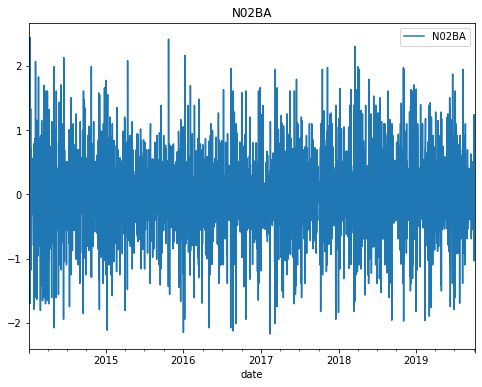

In [26]:
plt.figure()
difflog_N02BA.plot(figsize=(8, 6))
plt.title('N02BA')
plt.show()

Text(0.5, 1.0, 'Box Plot - Diff Log N02BA')

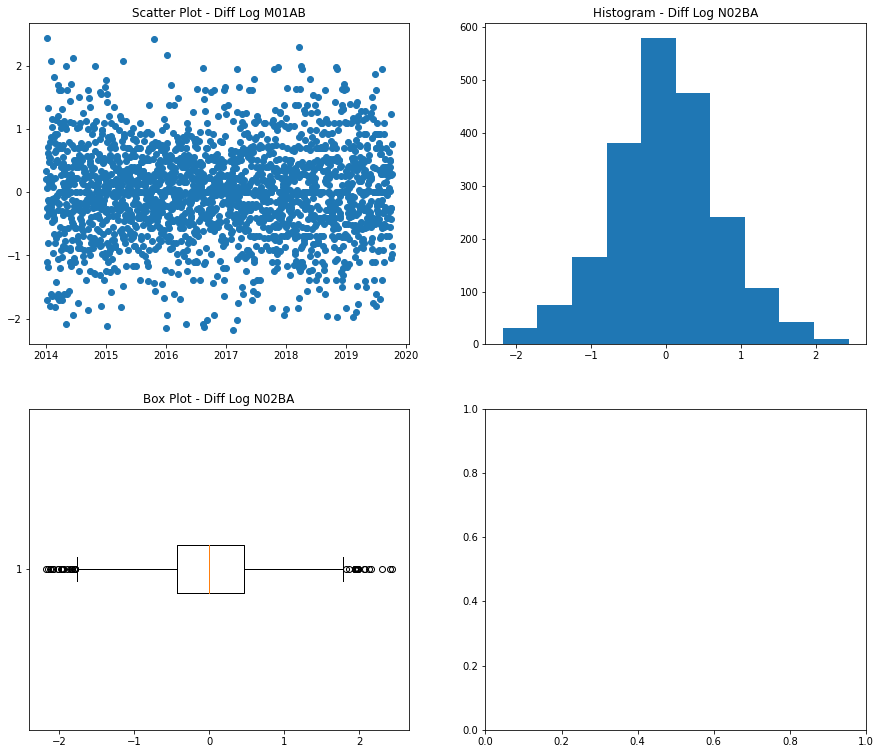

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(15, 13))
ax[0,0].scatter(y=difflog_N02BA, x=difflog_N02BA.index)
ax[0,0].set_title('Scatter Plot - Diff Log N02BA')
ax[0,1].hist(difflog_N02BA['N02BA'])
ax[0,1].set_title('Histogram - Diff Log N02BA')
ax[1,0].boxplot(difflog_N02BA['N02BA'], vert=False)
ax[1,0].set_title('Box Plot - Diff Log N02BA')

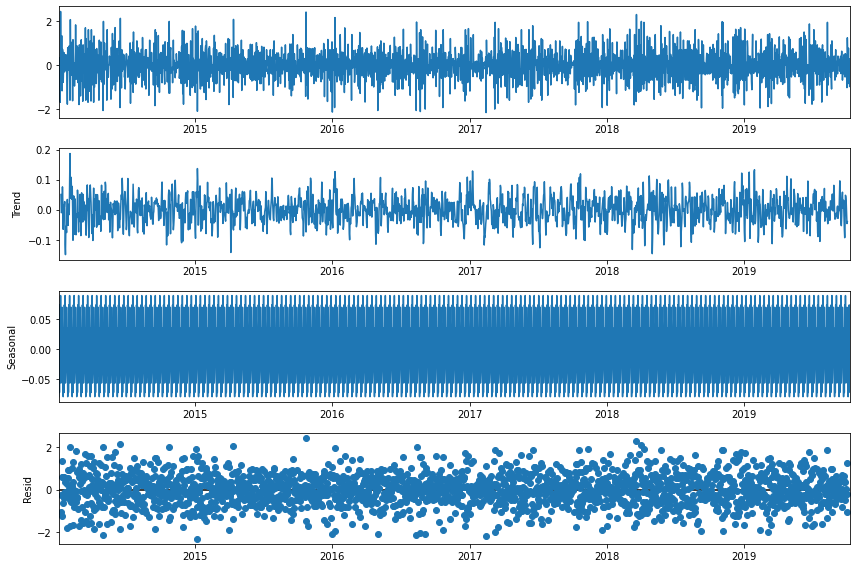

In [29]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
decomp2 = seasonal_decompose(difflog_N02BA, model='aditive',period=12)
decomp2.plot()
plt.show()

In [31]:
# evaluate series stationarity - unit root test
test2_adf = adfuller(difflog_N02BA, regression='c')
test2_kpss = kpss(difflog_N02BA, regression='c')
print("ADF p-value = {} | KPSS p-value = {}".format(test2_adf[1],test2_kpss[1]))

ADF p-value = 2.296779187374435e-30 | KPSS p-value = 0.1


/home/a95022/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/a95022/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


[]

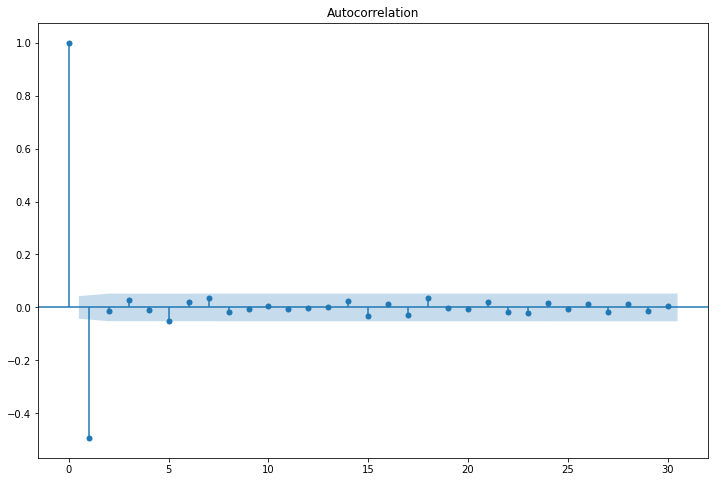

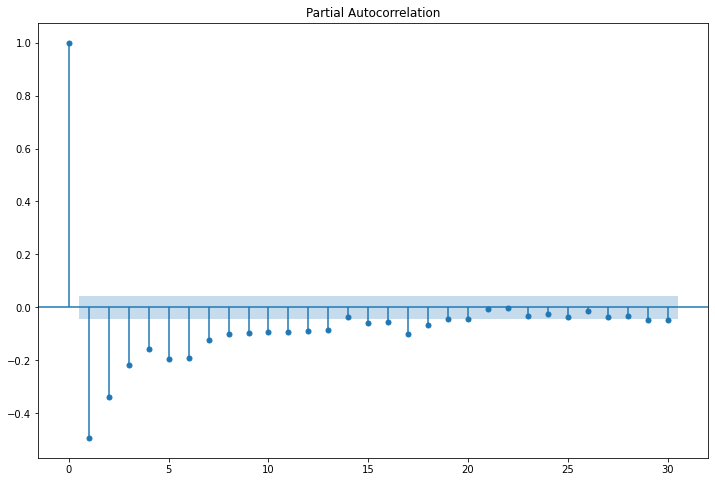

In [32]:
# correlogram
plot_acf(difflog_N02BA, lags=30, alpha=0.05)
plot_pacf(difflog_N02BA, lags=30, alpha=0.05)
plt.plot()

In [12]:
# Variable N02BA is not stationary in level and has positive bias.
# This variable is stationary on its first difference
# The logarithm of the first difference of this variable will be used for the forecast models

<Figure size 864x576 with 0 Axes>

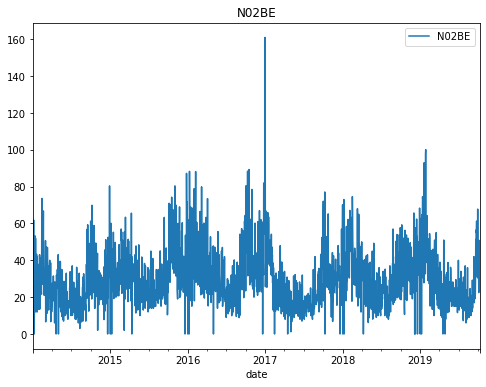

In [50]:
# M01AE
plt.figure()
N02BE.plot(figsize=(8, 6))
plt.title('N02BE')
plt.show()

Text(0.5, 1.0, 'Log Histogram')

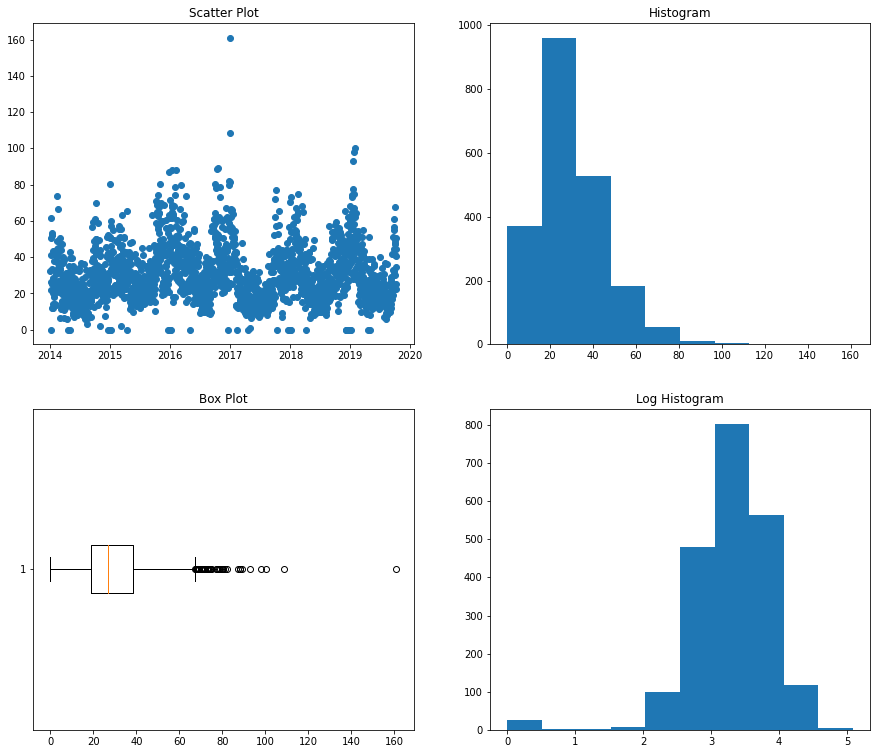

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(15, 13))
ax[0,0].scatter(y=N02BE, x=N02BE.index)
ax[0,0].set_title('Scatter Plot')
ax[0,1].hist(N02BE['N02BE'])
ax[0,1].set_title('Histogram')
ax[1,0].boxplot(N02BE['N02BE'], vert=False)
ax[1,0].set_title('Box Plot')
ax[1,1].hist(np.log(N02BE['N02BE'] + 1))
ax[1,1].set_title('Log Histogram')

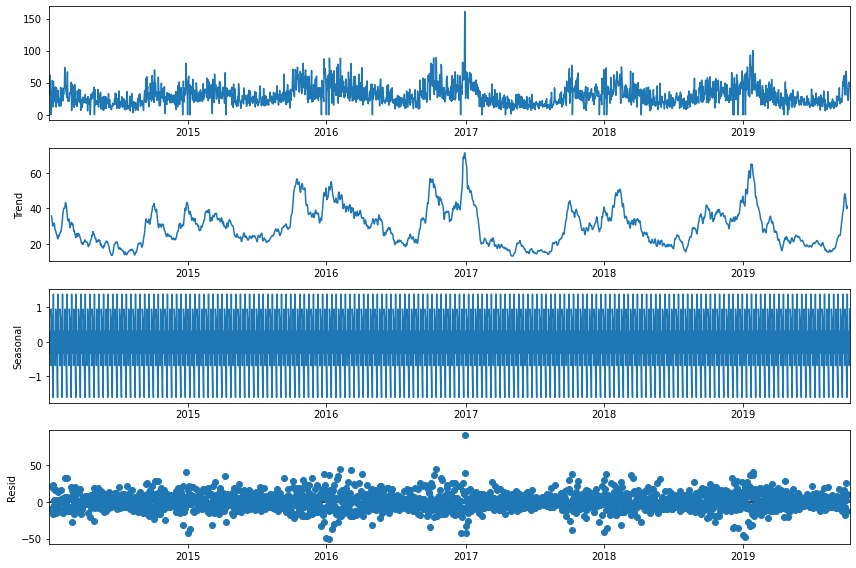

In [53]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
decomp3 = seasonal_decompose(N02BE, model='aditive',period=12)
decomp3.plot()
plt.show()

In [54]:
# evaluate series stationarity - unit root test
test3_adf = adfuller(N02BE, regression='c')
test3_kpss = kpss(N02BE, regression='c') # stationarity around a constant
print("ADF p-value = {} | KPSS p-value = {}".format(test3_adf[1],test3_kpss[1]))

ADF p-value = 0.0006753809397488172 | KPSS p-value = 0.1


/home/a95022/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/home/a95022/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




[]

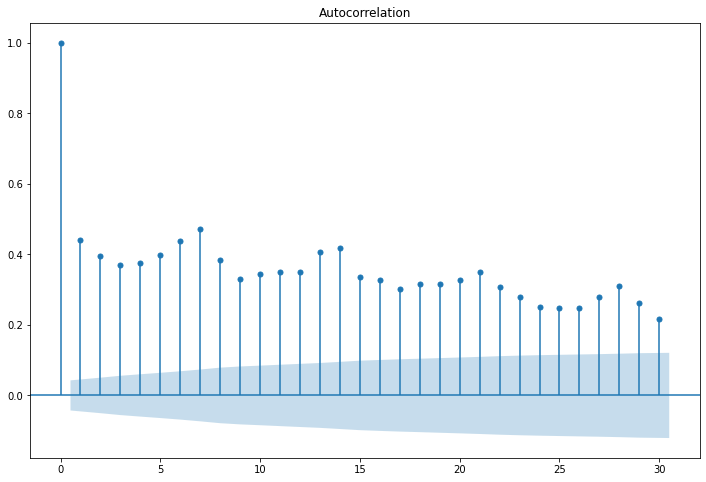

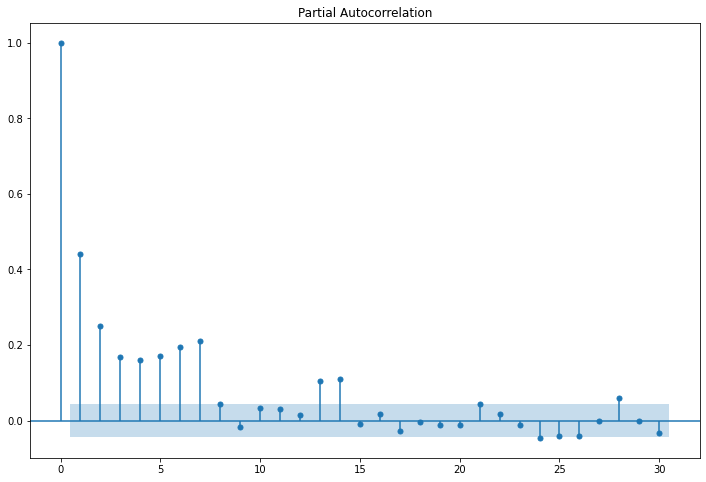

In [55]:
# correlogram
plot_acf(N02BE, lags=30, alpha=0.05)
plot_pacf(N02BE, lags=30, alpha=0.05)
plt.plot()

In [23]:
# stationarity test points towards the series being stationary, but it still shows positive skewness
# create logarithm of the variable
log_N02BE = np.log(N02BE + 1)
print(log_N02BE.shape)
log_N02BE.head(5)

(2106, 1)


,N02BE
date,
2014-01-02,3.508556
2014-01-03,3.943522
2014-01-04,4.140751
2014-01-05,3.740048
2014-01-06,3.122365


<Figure size 864x576 with 0 Axes>

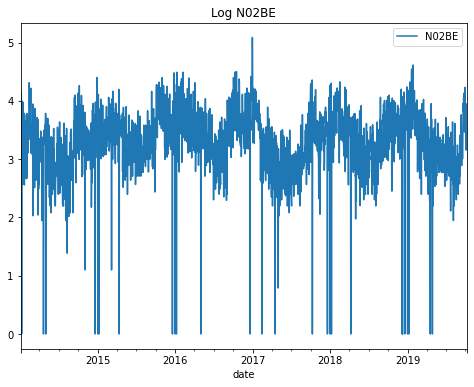

In [57]:
plt.figure()
log_N02BE.plot(figsize=(8, 6))
plt.title('Log N02BE')
plt.show()

Text(0.5, 1.0, 'Box Plot')

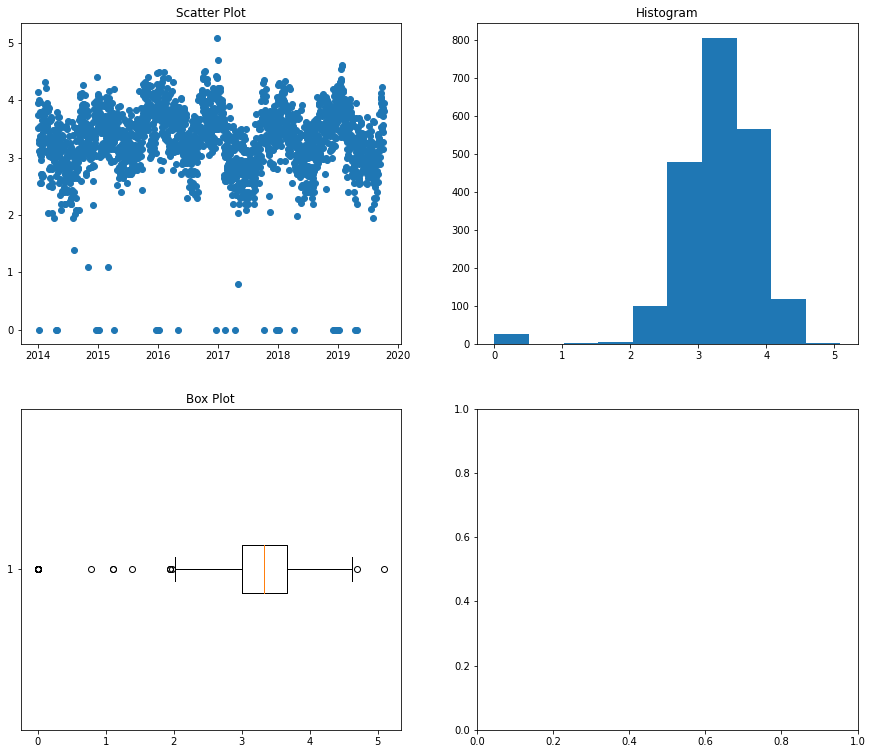

In [58]:
fig, ax = plt.subplots(2, 2, figsize=(15, 13))
ax[0,0].scatter(y=log_N02BE, x=log_N02BE.index)
ax[0,0].set_title('Scatter Plot')
ax[0,1].hist(log_N02BE['N02BE'])
ax[0,1].set_title('Histogram')
ax[1,0].boxplot(log_N02BE['N02BE'], vert=False)
ax[1,0].set_title('Box Plot')

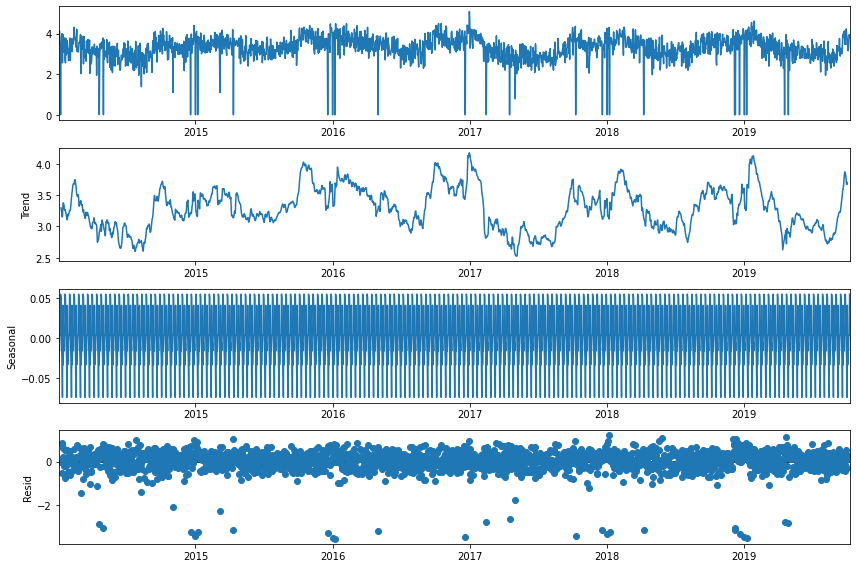

In [59]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
decomp4 = seasonal_decompose(log_N02BE, model='aditive',period=12)
decomp4.plot()
plt.show()

In [61]:
# evaluate series stationarity - unit root test
test4_adf = adfuller(log_N02BE, regression='c')
test4_kpss = kpss(log_N02BE, regression='c') # stationarity around a constant
print("ADF p-value = {} | KPSS p-value = {}".format(test4_adf[1],test4_kpss[1]))

ADF p-value = 0.0028288656281907757 | KPSS p-value = 0.1


/home/a95022/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/home/a95022/.local/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




[]

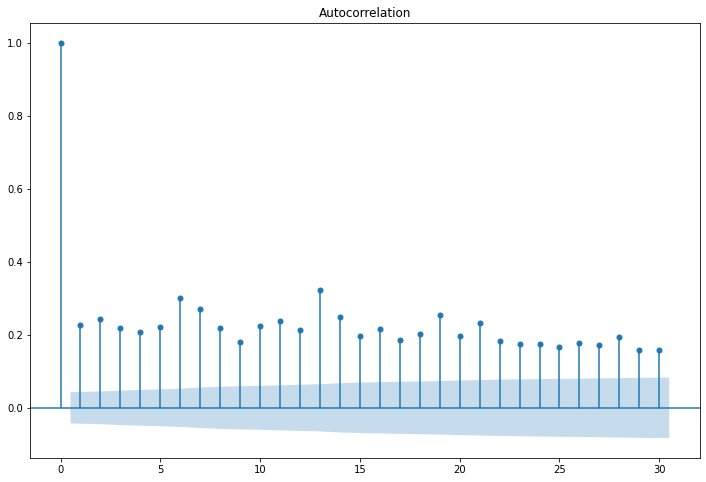

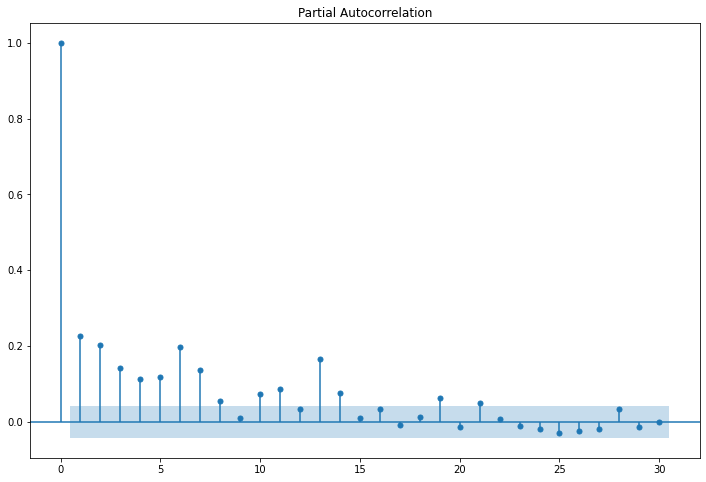

In [63]:
# correlogram
plot_acf(log_N02BE, lags=30, alpha=0.05)
plot_pacf(log_N02BE, lags=30, alpha=0.05)
plt.plot()

In [32]:
# N02BE is stationary in level and has positive skewness
# The logarithm of this variable will be used in the training of forecasting models

## Summary
- N02BA is stationary in the first difference and has positive skewness
- N02BE is stationary in level and has positive skewness

### Next
- Creation of baseline model - **Prophet**

In [33]:
# N02BA
from fbprophet import Prophet

In [34]:
N02BA.head(5)

,N02BA
date,
2014-01-02,3.4
2014-01-03,4.4
2014-01-04,6.5
2014-01-05,7.0
2014-01-06,4.5


In [35]:
N02BA_fb = N02BA.reset_index().rename(columns={'date':'ds', 'N02BA':'y'})
N02BA_fb.head(5)

,ds,y
0,2014-01-02,3.4
1,2014-01-03,4.4
2,2014-01-04,6.5
3,2014-01-05,7.0
4,2014-01-06,4.5


In [36]:
# train - test split
split_index = int(len(N02BA_fb)*0.8)
N02BA_fb_train = N02BA_fb.iloc[:split_index,:]
N02BA_fb_test = N02BA_fb.iloc[split_index:,:]
print('Train: {} | Test: {}'.format(N02BA_fb_train.shape, N02BA_fb_test.shape))

Train: (1684, 2) | Test: (422, 2)


In [37]:
# define a new Prophet object and fit to the data
model_N02BA_fb = Prophet()
model_N02BA_fb.fit(N02BA_fb_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
# make future predictions (out-of-sample): 422 time-periods allocation
baseline_pred = model_N02BA_fb.make_future_dataframe(periods=422, freq = 'd')
baseline_pred.tail()

,ds
2101,2019-10-04
2102,2019-10-05
2103,2019-10-06
2104,2019-10-07
2105,2019-10-08


In [39]:
baseline_prediction = model_N02BA_fb.predict(baseline_pred)

In [40]:
baseline_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2101,2019-10-04,2.101612,-0.756567,4.891045,2.027118,2.182542,-0.127146,-0.127146,-0.127146,0.064502,0.064502,0.064502,-0.191648,-0.191648,-0.191648,0.0,0.0,0.0,1.974466
2102,2019-10-05,2.099675,-0.586648,5.309114,2.024875,2.180925,0.199299,0.199299,0.199299,0.351043,0.351043,0.351043,-0.151744,-0.151744,-0.151744,0.0,0.0,0.0,2.298974
2103,2019-10-06,2.097739,-1.472986,4.634861,2.022465,2.179328,-0.565437,-0.565437,-0.565437,-0.454352,-0.454352,-0.454352,-0.111085,-0.111085,-0.111085,0.0,0.0,0.0,1.532302
2104,2019-10-07,2.095803,-0.928782,4.820217,2.020059,2.177732,-0.091636,-0.091636,-0.091636,-0.021700,-0.021700,-0.021700,-0.069936,-0.069936,-0.069936,0.0,0.0,0.0,2.004167
2105,2019-10-08,2.093866,-0.527216,5.324806,2.017922,2.176135,0.319787,0.319787,0.319787,0.348382,0.348382,0.348382,-0.028595,-0.028595,-0.028595,0.0,0.0,0.0,2.413653


In [41]:
baseline_prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2101,2019-10-04,1.974466,-0.756567,4.891045
2102,2019-10-05,2.298974,-0.586648,5.309114
2103,2019-10-06,1.532302,-1.472986,4.634861
2104,2019-10-07,2.004167,-0.928782,4.820217
2105,2019-10-08,2.413653,-0.527216,5.324806


[]

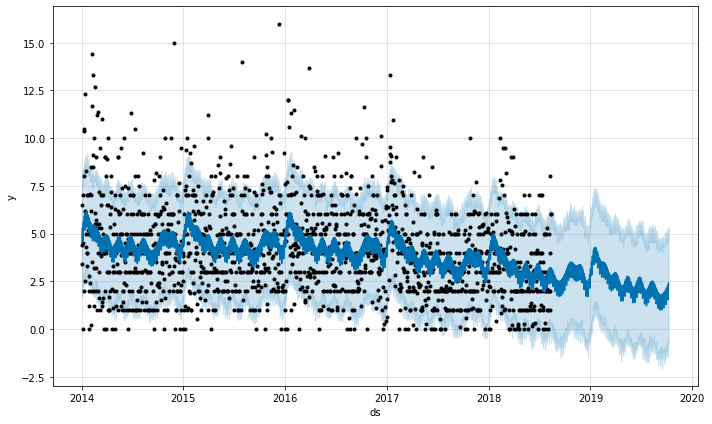

In [42]:
model_N02BA_fb.plot(baseline_prediction)
plt.plot()

In [43]:
N02BA_fb.set_index('ds', inplace=True)
baseline_prediction.set_index('ds', inplace=True)

In [44]:
viz_df1 = N02BA_fb.join(baseline_prediction[['yhat', 'yhat_lower','yhat_upper']], how ='outer')
viz_df1.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2014-01-02,3.4,4.535172,1.691148,7.332982
2014-01-03,4.4,4.909262,1.851076,7.803203
2014-01-04,6.5,5.299272,2.327219,8.351492
2014-01-05,7.0,4.596050,1.735957,7.511009
2014-01-06,4.5,5.128276,2.179943,8.189708


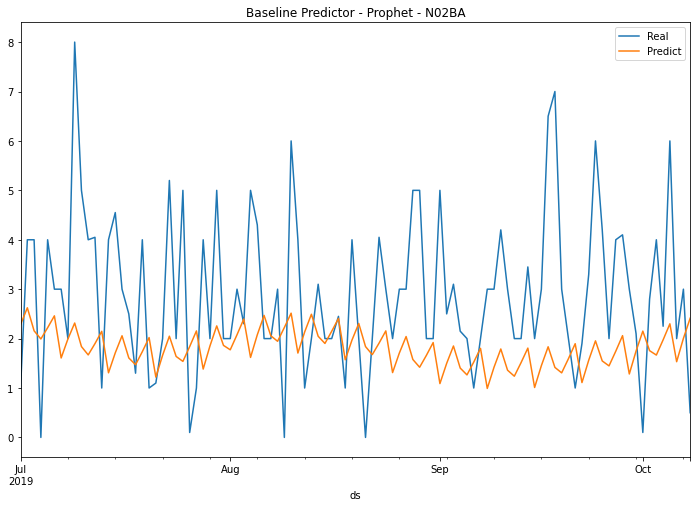

In [45]:
# see last 100 observations 
viz_df1.rename(columns={'y':'Real', 'yhat':'Predict'}, inplace=True)
viz_df1[['Real', 'Predict']].iloc[-100:,:].plot().get_figure()
plt.title('Baseline Predictor - Prophet - N02BA')
plt.show()

In [46]:
# Evaluate Model
comp_baseline1 = N02BA_fb_test.merge(baseline_prediction[['yhat']], how ='left', left_on='ds', right_index=True).set_index('ds')
comp_baseline1.tail(5)

,y,yhat
ds,,
2019-10-04,2.25,1.974466
2019-10-05,6.00,2.298974
2019-10-06,2.00,1.532302
2019-10-07,3.00,2.004167
2019-10-08,0.50,2.413653


In [47]:
print(baseline_prediction[['yhat']].tail())
print(N02BA_fb_test.tail())

                yhat
ds                  
2019-10-04  1.974466
2019-10-05  2.298974
2019-10-06  1.532302
2019-10-07  2.004167
2019-10-08  2.413653
             ds     y
2101 2019-10-04  2.25
2102 2019-10-05  6.00
2103 2019-10-06  2.00
2104 2019-10-07  3.00
2105 2019-10-08  0.50


In [49]:
MSE = mean_squared_error(comp_baseline1['y'], comp_baseline1['yhat'], squared=False)
MAE = mean_absolute_error(comp_baseline1['y'], comp_baseline1['yhat'])
MAPE = np.abs(np.mean(((comp_baseline1['yhat']+1) - (comp_baseline1['y']+1)) / (comp_baseline1['y']+1)))

comp_baseline1_1 = comp_baseline1[comp_baseline1['y'] != 0]
MAPE2 = np.abs(np.mean((comp_baseline1_1['yhat'] - comp_baseline1_1['y']) / comp_baseline1_1['y'])) # MAPE for non-null values

print('Prophet Baseline - N02BA')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE, MAE, MAPE2))

Prophet Baseline - N02BA
MSE: 2.0804249056511686 
MAE: 1.578675338851074 
MAPE: 0.2820593599214994


In [64]:
# N02BE
N02BE.head(5)

,N02BE
date,
2014-01-02,32.40
2014-01-03,50.60
2014-01-04,61.85
2014-01-05,41.10
2014-01-06,21.70


In [65]:
N02BE_fb = N02BE.reset_index().rename(columns={'date':'ds', 'N02BE':'y'})
N02BE_fb.head(5)

,ds,y
0,2014-01-02,32.40
1,2014-01-03,50.60
2,2014-01-04,61.85
3,2014-01-05,41.10
4,2014-01-06,21.70


In [66]:
# train - test split
split_index = int(len(N02BE_fb)*0.8)
N02BE_fb_train = N02BE_fb.iloc[:split_index,:]
N02BE_fb_test = N02BE_fb.iloc[split_index:,:]
print('Train: {} | Test: {}'.format(N02BE_fb_train.shape, N02BE_fb_test.shape))

Train: (1684, 2) | Test: (422, 2)


In [67]:
# define a new Prophet object and fit to the data
model_N02BE_fb = Prophet()
model_N02BE_fb.fit(N02BE_fb_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
# make future predictions (out-of-sample): 422 time-periods allocation
baseline_pred2 = model_N02BE_fb.make_future_dataframe(periods=422, freq = 'd')
baseline_pred2.tail()

,ds
2101,2019-10-04
2102,2019-10-05
2103,2019-10-06
2104,2019-10-07
2105,2019-10-08


In [69]:
baseline_prediction2 = model_N02BE_fb.predict(baseline_pred2)

In [70]:
baseline_prediction2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2101,2019-10-04,35.030739,30.214226,63.830203,30.990932,38.729366,11.740293,11.740293,11.740293,-1.468230,-1.468230,-1.468230,13.208523,13.208523,13.208523,0.0,0.0,0.0,46.771032
2102,2019-10-05,35.041229,34.777812,69.331150,30.987795,38.749521,17.571413,17.571413,17.571413,3.855789,3.855789,3.855789,13.715624,13.715624,13.715624,0.0,0.0,0.0,52.612643
2103,2019-10-06,35.051720,35.942353,69.000018,30.985404,38.771782,17.074325,17.074325,17.074325,2.906732,2.906732,2.906732,14.167593,14.167593,14.167593,0.0,0.0,0.0,52.126044
2104,2019-10-07,35.062210,31.669959,65.503312,30.983014,38.797216,13.746397,13.746397,13.746397,-0.813700,-0.813700,-0.813700,14.560097,14.560097,14.560097,0.0,0.0,0.0,48.808607
2105,2019-10-08,35.072700,31.132037,66.156161,30.976410,38.822650,13.702971,13.702971,13.702971,-1.186268,-1.186268,-1.186268,14.889240,14.889240,14.889240,0.0,0.0,0.0,48.775671


In [71]:
baseline_prediction2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2101,2019-10-04,46.771032,30.214226,63.830203
2102,2019-10-05,52.612643,34.777812,69.331150
2103,2019-10-06,52.126044,35.942353,69.000018
2104,2019-10-07,48.808607,31.669959,65.503312
2105,2019-10-08,48.775671,31.132037,66.156161


[]

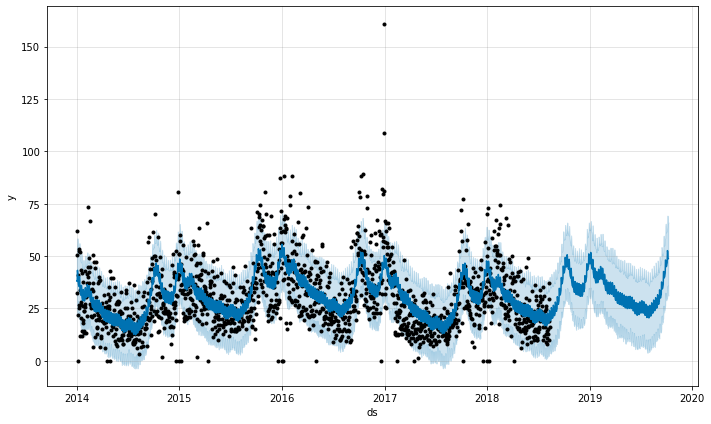

In [72]:
model_N02BE_fb.plot(baseline_prediction2)
plt.plot()

In [73]:
N02BE_fb.set_index('ds', inplace=True)
baseline_prediction2.set_index('ds', inplace=True)

In [74]:
viz_df2 = N02BE_fb.join(baseline_prediction2[['yhat', 'yhat_lower','yhat_upper']], how ='outer')
viz_df2.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2014-01-02,32.40,38.044013,21.723452,53.662016
2014-01-03,50.60,37.987749,22.679987,55.290754
2014-01-04,61.85,43.195273,28.725125,58.495644
2014-01-05,41.10,42.038139,26.206026,57.381396
2014-01-06,21.70,38.023720,22.987539,53.070526


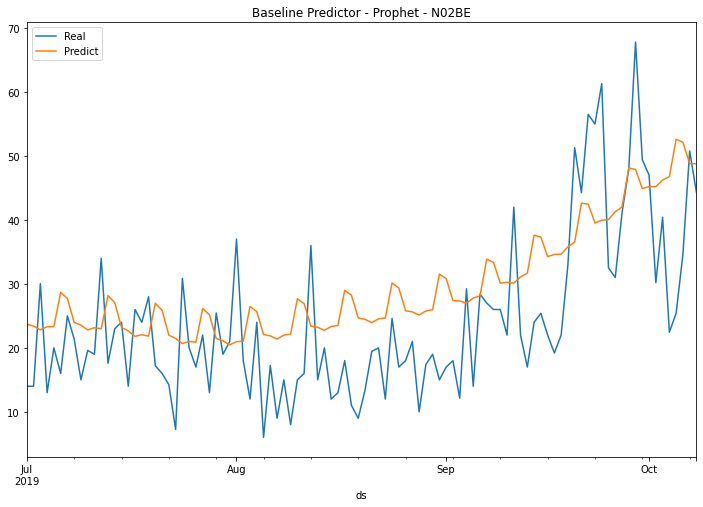

In [75]:
# see last 100 observations 
viz_df2.rename(columns={'y':'Real', 'yhat':'Predict'}, inplace=True)
viz_df2[['Real', 'Predict']].iloc[-100:,:].plot().get_figure()
plt.title('Baseline Predictor - Prophet - N02BE')
plt.show()

In [76]:
# Evaluate Model
comp_baseline2 = N02BE_fb_test.merge(baseline_prediction2[['yhat']], how ='left', left_on='ds', right_index=True).set_index('ds')
comp_baseline2.tail(5)

,y,yhat
ds,,
2019-10-04,22.45,46.771032
2019-10-05,25.40,52.612643
2019-10-06,34.60,52.126044
2019-10-07,50.80,48.808607
2019-10-08,44.30,48.775671


In [77]:
MSE_2 = mean_squared_error(comp_baseline2['y'], comp_baseline2['yhat'], squared=False)
MAE_2 = mean_absolute_error(comp_baseline2['y'], comp_baseline2['yhat'])
MAPE_2 = np.abs(np.mean(((comp_baseline2['yhat']+1) - (comp_baseline2['y']+1)) / (comp_baseline2['y']+1)))

comp_baseline2_1 = comp_baseline2[comp_baseline2['y'] != 0]
MAPE2_2 = np.abs(np.mean((comp_baseline2_1['yhat'] - comp_baseline2_1['y']) / comp_baseline2_1['y'])) # MAPE for non-null values

print('Prophet Baseline - M01AE')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE_2, MAE_2, MAPE2_2))

Prophet Baseline - M01AE
MSE: 13.272528280679568 
MAE: 10.278503954472267 
MAPE: 0.24793656448553114


In [78]:
results_table = pd.DataFrame([[MSE, MAE, '{:,.2%}'.format(MAPE2)],[MSE_2, MAE_2, '{:,.2%}'.format(MAPE2_2)]], 
                             index=['Prophet - N02BA', 'Prophet - N02BE'], columns=['MSE', 'MAE', 'MAPE'])
results_table

,MSE,MAE,MAPE
Prophet - N02BA,2.080425,1.578675,28.21%
Prophet - N02BE,13.272528,10.278504,24.79%


# ARIMA + SARIMA

### N02BA
- N02BA is stationary in the first difference and has positive skewness

In [24]:
np.log(N02BA+1).head(5)

,N02BA
date,
2014-01-02,1.481605
2014-01-03,1.686399
2014-01-04,2.014903
2014-01-05,2.079442
2014-01-06,1.704748


In [25]:
N02BA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N02BA   2106 non-null   float64
dtypes: float64(1)
memory usage: 32.9 KB


In [26]:
index = int(len(N02BA.index)*0.8)
log_N02BA = np.log(N02BA+1)
log_N02BA_train = log_N02BA.iloc[:index,:]
log_N02BA_test = log_N02BA.iloc[index:,:]
print("Train: {} | Test: {}".format(log_N02BA_train.shape, log_N02BA_test.shape))

Train: (1684, 1) | Test: (422, 1)


In [82]:
# auto-arima for ARIMA model
log_N02BA_fit = pm.auto_arima(log_N02BA_train, start_p=1, start_q=1,max_p=10, max_q=10,
seasonal=False,d=1, trace=True, error_action='ignore', # don't want to know if an order does not work
suppress_warnings=True, # don't want convergence warnings
stepwise=True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2598.014, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3695.726, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3228.791, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2596.605, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3693.726, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2598.020, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2599.991, Time=0.80 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2595.716, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2597.164, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2597.169, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3226.792, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2599.117, Time=0.20 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.543 seconds


In [83]:
# output of best arima model
print(log_N02BA_fit.summary())
# validade previous Ljung-Box test
print(sm.stats.diagnostic.acorr_ljungbox(log_N02BA_fit.resid(), lags=[7], return_df=True))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1684
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1295.858
Date:                Wed, 16 Jun 2021   AIC                           2595.716
Time:                        22:47:26   BIC                           2606.573
Sample:                             0   HQIC                          2599.737
                               - 1684                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9802      0.005   -194.571      0.000      -0.990      -0.970
sigma2         0.2726      0.008     33.742      0.000       0.257       0.288
Ljung-Box (L1) (Q):                   0.47   Jarque-

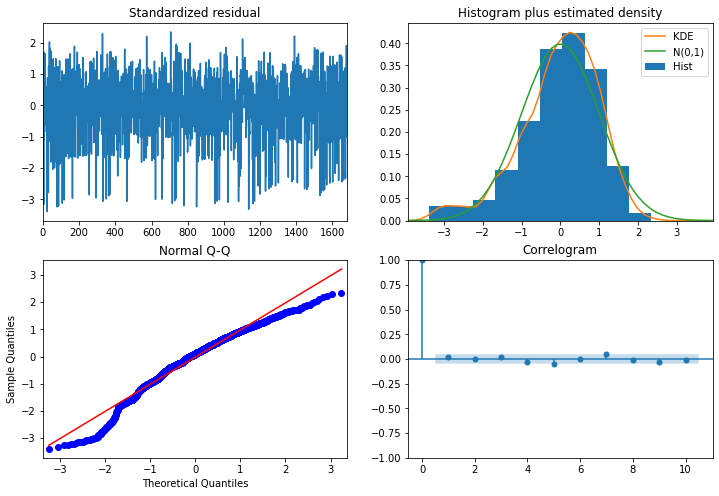

In [84]:
# residuals analysis - overall
log_N02BA_fit.plot_diagnostics()
plt.show()

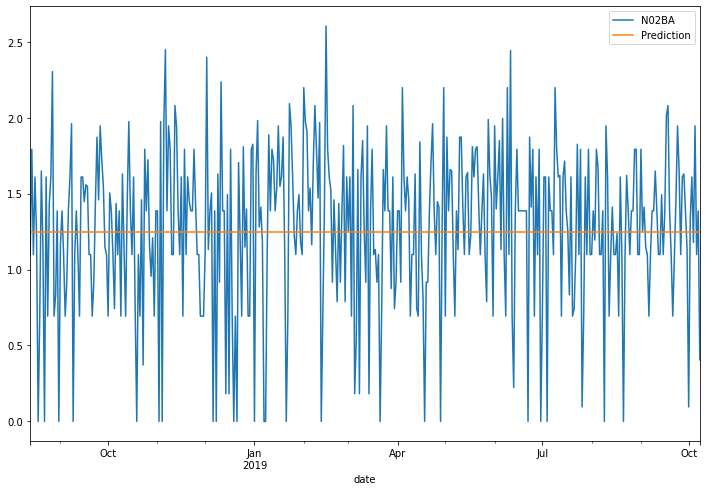

In [85]:
# out-of-sample forecast
N02BA_arima_for = log_N02BA_fit.predict(n_periods=len(log_N02BA_test.index))

# join the forecasted value and the gdp_test values in the same dataframe and plot both

N02BA_arima_for = pd.DataFrame(N02BA_arima_for,index = log_N02BA_test.index,columns=['Prediction'])
pd.concat([log_N02BA_test,N02BA_arima_for],axis=1).plot()
plt.show()

In [86]:
results_arima = np.exp(pd.concat([log_N02BA_test,N02BA_arima_for],axis=1)-1)
results_arima.tail(15)

,N02BA,Prediction
date,,
2019-09-24,2.575156,1.279606
2019-09-25,1.912973,1.279606
2019-09-26,1.103638,1.279606
2019-09-27,1.839397,1.279606
2019-09-28,1.876185,1.279606
2019-09-29,1.471518,1.279606
2019-09-30,1.140426,1.279606
2019-10-01,0.404667,1.279606
2019-10-02,1.397942,1.279606


In [88]:
MSE_arima = mean_squared_error(results_arima['N02BA'], results_arima['Prediction'], squared=False)
MAE_arima = mean_absolute_error(results_arima['N02BA'], results_arima['Prediction'])

results_arima_non_null = results_arima[results_arima['N02BA'] != 0]
MAPE_arima = np.abs(np.mean((results_arima_non_null['Prediction'] - results_arima_non_null['N02BA']) / results_arima_non_null['N02BA'])) # MAPE for non-null values

print('ARIMA - N02BA')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE_arima, MAE_arima, MAPE_arima))

ARIMA - N02BA
MSE: 0.7444823436668625 
MAE: 0.5611702971745838 
MAPE: 0.14261398169599743


In [91]:
# SARIMA

# Define the parameters p and q to take any value between 0 and 8
q = p = range(0, 8)
# Define the d parameters to take any value between 0 and 1
d = range(0, 1)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(range(0,2), range(0,1), range(0,2)))]

# auto-sarimax loop

warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod2 = sm.tsa.statespace.SARIMAX(log_N02BA_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod2.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [92]:
# print best model
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 2524.037059307157 for model SARIMAX(5, 1, 7)x(0, 0, 1, 12)


In [93]:
log_N02BA_fit2 = sm.tsa.statespace.SARIMAX(log_N02BA_train,order=(5,1,7),seasonal_order=(0,0,1,12), enforce_stationarity=False, enforce_invertibility=False)
log_N02BA_fit_sarima = log_N02BA_fit2.fit()

In [94]:
# output of best sarimax model
print(log_N02BA_fit_sarima.summary())
# validade previous Ljung-Box test
print(sm.stats.diagnostic.acorr_ljungbox(log_N02BA_fit_sarima.resid, lags=[6], return_df=True))

                                      SARIMAX Results                                       
Dep. Variable:                                N02BA   No. Observations:                 1684
Model:             SARIMAX(5, 1, 7)x(0, 0, [1], 12)   Log Likelihood               -1248.019
Date:                              Wed, 16 Jun 2021   AIC                           2524.037
Time:                                      23:21:43   BIC                           2599.866
Sample:                                  01-02-2014   HQIC                          2552.140
                                       - 08-12-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8957      0.216     -4.142      0.000      -1.320      -0.472
ar.L2         -1.35

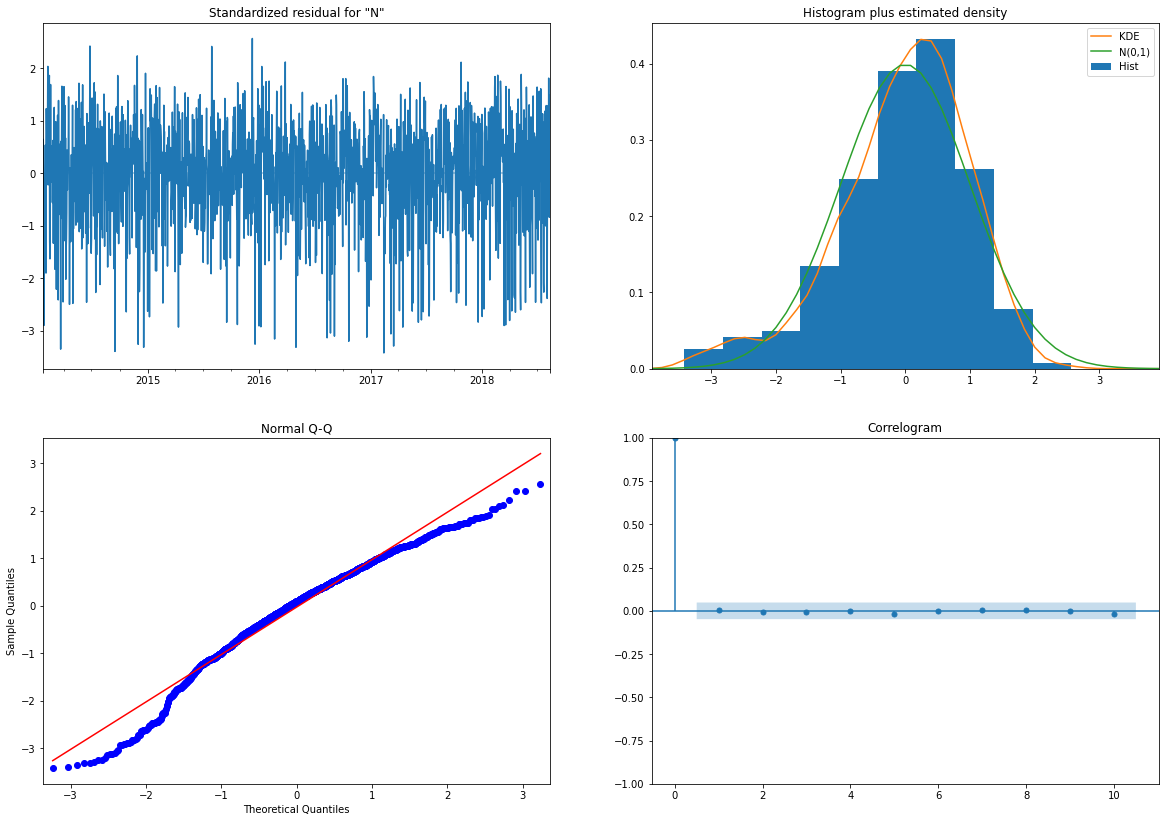

In [95]:
# visual check for residuals
log_N02BA_fit_sarima.plot_diagnostics(figsize=(20, 14))
plt.show()

In [96]:
# out-of-sample forecast
pred_sarima = log_N02BA_fit_sarima.get_forecast('2019-10-08')
pred_sarima_ci = log_N02BA_fit_sarima.conf_int()
print(pred_sarima.predicted_mean)

2018-08-13    1.268677
2018-08-14    1.332119
2018-08-15    1.143591
2018-08-16    1.237271
2018-08-17    1.259092
                ...   
2019-10-04    1.263980
2019-10-05    1.254962
2019-10-06    1.236709
2019-10-07    1.253681
2019-10-08    1.264414
Freq: D, Name: predicted_mean, Length: 422, dtype: float64


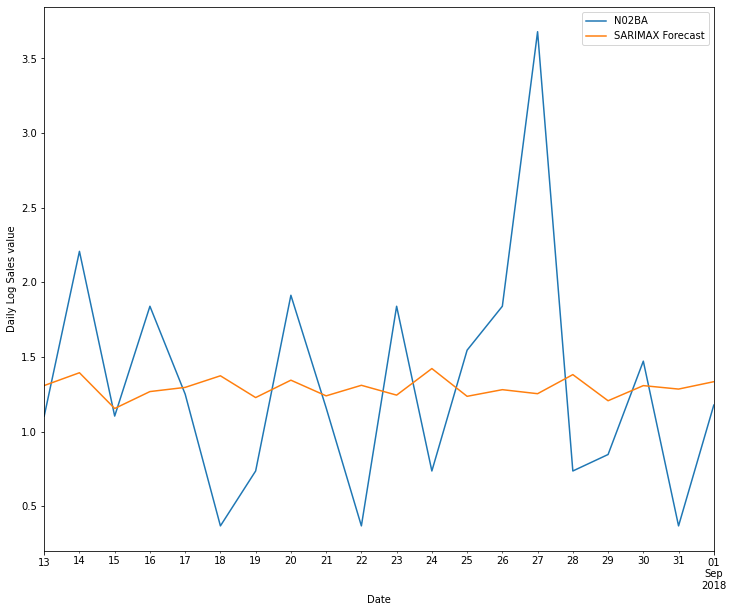

In [97]:
# plot all predictions in the same picture
ax = np.exp(log_N02BA_test-1)[:20].plot(figsize=(12, 10))
np.exp(pred_sarima.predicted_mean-1)[:20].plot(ax=ax, label='SARIMAX Forecast')
# ax.fill_between(pred_sarima_ci.index, pred_sarima_ci.iloc[:, 0], pred_sarima_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Daily Log Sales value')
plt.xlabel('Date')
plt.legend()

In [104]:
results_sarima = np.exp(pd.concat([log_N02BA_test,pred_sarima.predicted_mean],axis=1)-1)
results_sarima.rename(columns={'predicted_mean':'Prediction'}, inplace=True)
results_sarima.head(15)

,N02BA,Prediction
2018-08-13,1.103638,1.308233
2018-08-14,2.207277,1.393919
2018-08-15,1.103638,1.154412
2018-08-16,1.839397,1.267784
2018-08-17,1.250790,1.295753
2018-08-18,0.367879,1.373525
2018-08-19,0.735759,1.227634
2018-08-20,1.912973,1.344129
2018-08-21,1.158820,1.239051
2018-08-22,0.367879,1.309827


In [105]:
MSE_sarima = mean_squared_error(results_sarima['N02BA'], results_sarima['Prediction'], squared=False)
MAE_sarima = mean_absolute_error(results_sarima['N02BA'], results_sarima['Prediction'])

results_sarima_non_null = results_sarima[results_sarima['N02BA'] != 0]
MAPE_sarima = np.abs(np.mean((results_sarima_non_null['Prediction'] - results_sarima_non_null['N02BA']) / results_sarima_non_null['N02BA'])) # MAPE for non-null values

print('SARIMA - N02BA')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE_sarima, MAE_sarima, MAPE_sarima))

SARIMA - N02BA
MSE: 0.7439775920322005 
MAE: 0.5606098628281903 
MAPE: 0.1500345969795215


### N02BE
- N02BE is stationary in level and has positive skewness

In [107]:
np.log(N02BE+1).head(5)

,N02BE
date,
2014-01-02,3.508556
2014-01-03,3.943522
2014-01-04,4.140751
2014-01-05,3.740048
2014-01-06,3.122365


In [109]:
N02BE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N02BE   2106 non-null   float64
dtypes: float64(1)
memory usage: 32.9 KB


In [110]:
index = int(len(N02BE.index)*0.8)
log_N02BE = np.log(N02BE+1)
log_N02BE_train = log_N02BE.iloc[:index,:]
log_N02BE_test = log_N02BE.iloc[index:,:]
print("Train: {} | Test: {}".format(log_N02BE_train.shape, log_N02BE_test.shape))

Train: (1684, 1) | Test: (422, 1)


In [111]:
# auto-arima for ARIMA model
log_N02BE_fit = pm.auto_arima(log_N02BE_train, start_p=1, start_q=1,max_p=10, max_q=10,
seasonal=False,d=1, trace=True, error_action='ignore', # don't want to know if an order does not work
suppress_warnings=True, # don't want convergence warnings
stepwise=True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2711.529, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3795.012, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3313.767, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2711.133, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3793.012, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2711.397, Time=0.54 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2714.247, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2709.179, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2709.573, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2709.441, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3311.768, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2712.170, Time=0.29 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.810 seconds


In [112]:
# output of best arima model
print(log_N02BE_fit.summary())
# validade previous Ljung-Box test
print(sm.stats.diagnostic.acorr_ljungbox(log_N02BE_fit.resid(), lags=[7], return_df=True))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1684
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1352.590
Date:                Fri, 18 Jun 2021   AIC                           2709.179
Time:                        11:55:57   BIC                           2720.036
Sample:                             0   HQIC                          2713.200
                               - 1684                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9242      0.009   -102.279      0.000      -0.942      -0.906
sigma2         0.2918      0.003     85.238      0.000       0.285       0.299
Ljung-Box (L1) (Q):                   1.41   Jarque-

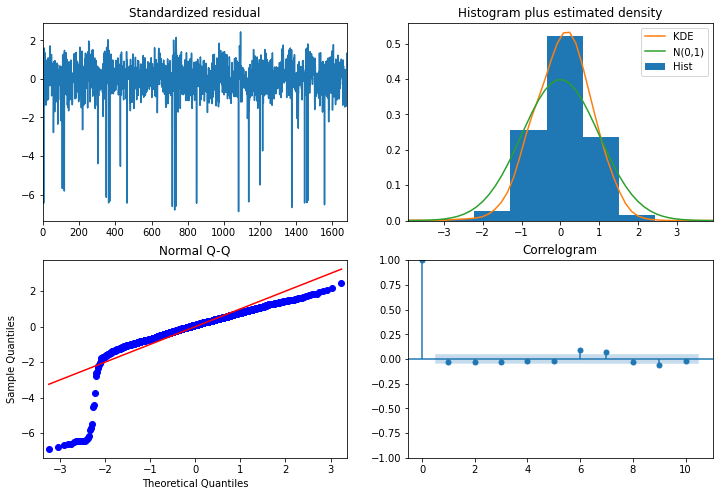

In [113]:
# residuals analysis - overall
log_N02BE_fit.plot_diagnostics()
plt.show()

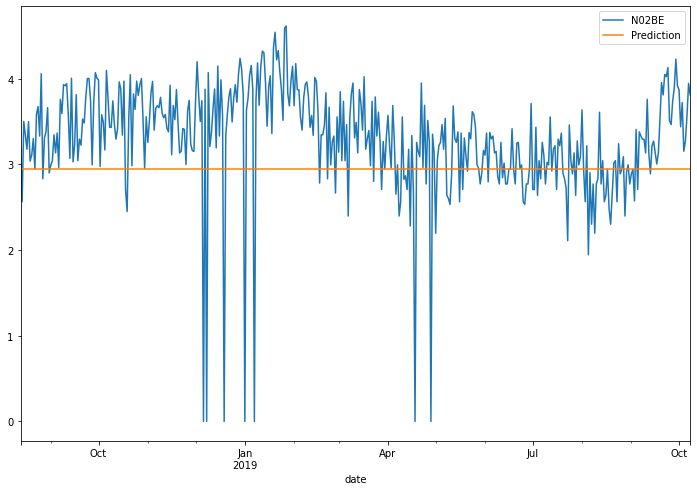

In [114]:
# out-of-sample forecast
N02BE_arima_for = log_N02BE_fit.predict(n_periods=len(log_N02BE_test.index))

# join the forecasted value and the gdp_test values in the same dataframe and plot both

N02BE_arima_for = pd.DataFrame(N02BE_arima_for,index = log_N02BE_test.index,columns=['Prediction'])
pd.concat([log_N02BE_test,N02BE_arima_for],axis=1).plot()
plt.show()

In [115]:
results_arima2 = np.exp(pd.concat([log_N02BE_test,N02BE_arima_for],axis=1)-1)
results_arima2.tail(15)

,N02BE,Prediction
date,,
2019-09-24,22.918889,7.043931
2019-09-25,12.323961,7.043931
2019-09-26,11.772142,7.043931
2019-09-27,15.487724,7.043931
2019-09-28,18.026093,7.043931
2019-09-29,25.310106,7.043931
2019-09-30,18.541124,7.043931
2019-10-01,17.658213,7.043931
2019-10-02,11.477839,7.043931


In [117]:
MSE_arima2 = mean_squared_error(results_arima2['N02BE'], results_arima2['Prediction'], squared=False)
MAE_arima2 = mean_absolute_error(results_arima2['N02BE'], results_arima2['Prediction'])

results_arima_non_null2 = results_arima2[results_arima2['N02BE'] != 0]
MAPE_arima2 = np.abs(np.mean((results_arima_non_null2['Prediction'] - results_arima_non_null2['N02BE']) / results_arima_non_null2['N02BE'])) # MAPE for non-null values

print('ARIMA - N02BE')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE_arima2, MAE_arima2, MAPE_arima2))

ARIMA - N02BE
MSE: 7.384015826263897 
MAE: 5.37341078572581 
MAPE: 0.05091154411226328


In [118]:
# SARIMA

# Define the parameters p and q to take any value between 0 and 8
q = p = range(0, 8)
# Define the d parameters to take any value between 0 and 1
d = range(0, 1)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(range(0,2), range(0,1), range(0,2)))]

# auto-sarimax loop

warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod2 = sm.tsa.statespace.SARIMAX(log_N02BE_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod2.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [119]:
# print best model
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 2602.8870226175395 for model SARIMAX(7, 0, 7)x(0, 0, 1, 12)


In [120]:
log_N02BE_fit2 = sm.tsa.statespace.SARIMAX(log_N02BE_train,order=(7,0,7),seasonal_order=(0,0,1,12), enforce_stationarity=False, enforce_invertibility=False)
log_N02BE_fit_sarima = log_N02BE_fit2.fit()

In [121]:
# output of best sarimax model
print(log_N02BE_fit_sarima.summary())
# validade previous Ljung-Box test
print(sm.stats.diagnostic.acorr_ljungbox(log_N02BE_fit_sarima.resid, lags=[1], return_df=True))

                                      SARIMAX Results                                       
Dep. Variable:                                N02BE   No. Observations:                 1684
Model:             SARIMAX(7, 0, 7)x(0, 0, [1], 12)   Log Likelihood               -1285.444
Date:                              Fri, 18 Jun 2021   AIC                           2602.887
Time:                                      12:16:16   BIC                           2689.559
Sample:                                  01-02-2014   HQIC                          2635.008
                                       - 08-12-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2945      0.123      2.399      0.016       0.054       0.535
ar.L2         -0.11

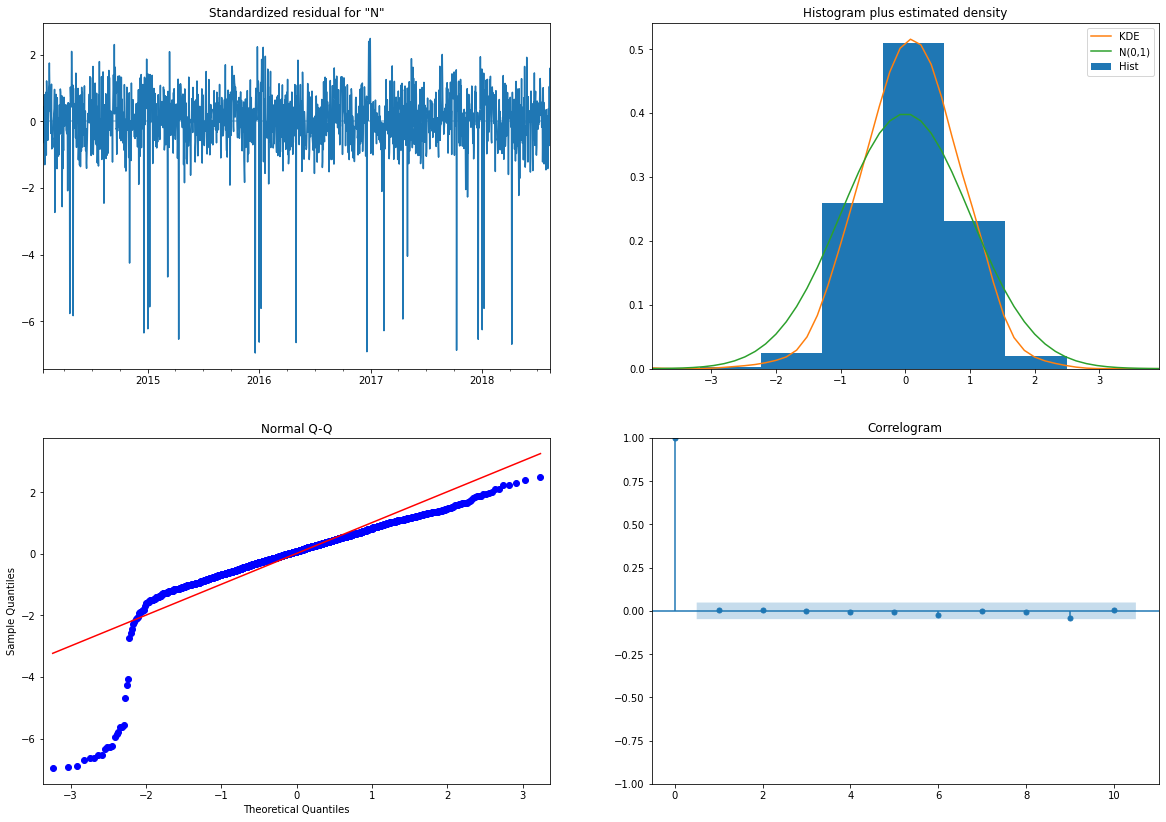

In [122]:
# visual check for residuals
log_N02BE_fit_sarima.plot_diagnostics(figsize=(20, 14))
plt.show()

In [123]:
# out-of-sample forecast
pred_sarima2 = log_N02BE_fit_sarima.get_forecast('2019-10-08')
pred_sarima_ci2 = log_N02BE_fit_sarima.conf_int()
print(pred_sarima2.predicted_mean)

2018-08-13    2.964398
2018-08-14    2.876274
2018-08-15    2.945696
2018-08-16    2.958791
2018-08-17    3.037734
                ...   
2019-10-04    2.746354
2019-10-05    2.745897
2019-10-06    2.745440
2019-10-07    2.744983
2019-10-08    2.744526
Freq: D, Name: predicted_mean, Length: 422, dtype: float64


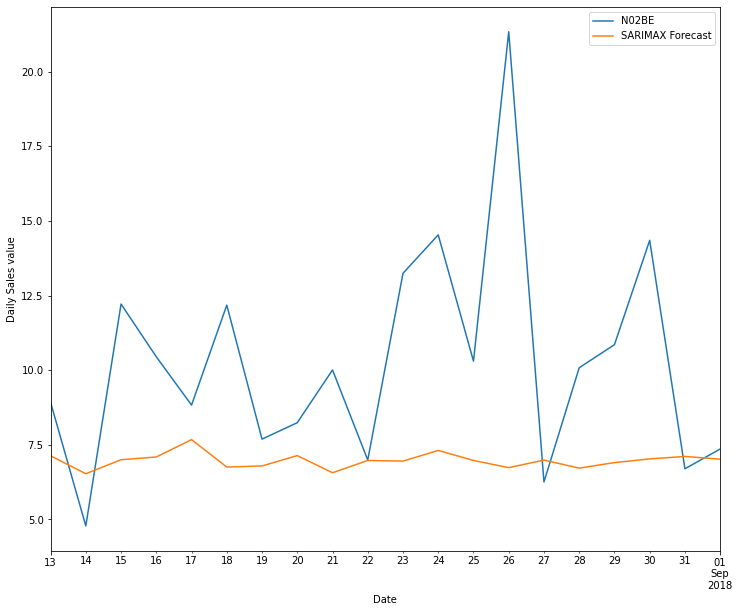

In [124]:
# plot all predictions in the same picture
ax = np.exp(log_N02BE_test-1)[:20].plot(figsize=(12, 10))
np.exp(pred_sarima2.predicted_mean-1)[:20].plot(ax=ax, label='SARIMAX Forecast')
# ax.fill_between(pred_sarima_ci.index, pred_sarima_ci.iloc[:, 0], pred_sarima_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Daily Sales value')
plt.xlabel('Date')
plt.legend()

In [129]:
results_sarima2 = np.exp(pd.concat([log_N02BE_test,pred_sarima2.predicted_mean],axis=1)-1)
results_sarima2.rename(columns={'predicted_mean':'Prediction'}, inplace=True)
results_sarima2.head(15)

,N02BE,Prediction
2018-08-13,8.921076,7.130618
2018-08-14,4.782433,6.529134
2018-08-15,12.213597,6.998504
2018-08-16,10.447776,7.090750
2018-08-17,8.829107,7.673205
2018-08-18,12.176810,6.752954
2018-08-19,7.688680,6.790609
2018-08-20,8.240499,7.137064
2018-08-21,10.006321,6.562719
2018-08-22,6.989709,6.974481


In [130]:
MSE_sarima2 = mean_squared_error(results_sarima2['N02BE'], results_sarima2['Prediction'], squared=False)
MAE_sarima2 = mean_absolute_error(results_sarima2['N02BE'], results_sarima2['Prediction'])

results_sarima_non_null2 = results_sarima2[results_sarima2['N02BE'] != 0]
MAPE_sarima2 = np.abs(np.mean((results_sarima_non_null2['Prediction'] - results_sarima_non_null2['N02BE']) / results_sarima_non_null2['N02BE'])) # MAPE for non-null values

print('SARIMA - N02BE')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE_sarima2, MAE_sarima2, MAPE_sarima2))

SARIMA - N02BE
MSE: 7.775018637330781 
MAE: 5.763832800246692 
MAPE: 0.05766509238153516
